<a href="https://colab.research.google.com/github/erica-mccormick/tutorials/blob/main/Introduction_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Helpful Tips & Tricks for Python and GoogleColab**
## Erica McCormick | 2022

# **Colab Caveat**:

GoogleColab is great for testing out Python code quickly and for making easily-sharable notebooks (the .ipynb ending) with lots of documentation.

However, using a code editor to work with .py files directly can also be powerful and efficient once you learn the basics.

Some of the advantages to developing your skill in using a code editor are:

* Easily install & keep track of external packages and environments 
  * No pip installing each time = faster!
  * No authentication each time = faster!
  * Use conda to make environments so your code will still run years from now when there is a new Python version and updated packages!
  * Colab could change at any time without warning, or become $$$!
* Make scripts, not chunks
  * Python files run from the beginning every time
  * This avoids accidentally running Colab chunks out of order and getting weird results!
* Save your figures and data
  * You can make folders right from your Python code
  * You can save right to your computer without going through Drive
  * Make and save more data and figures throughout the analysis process
* Easier version control (such as GitHub)
  *  Reduce the chance of losing unsaved or overwritten data in a shared Colab file!
  * Get acquainted with command line git commands
  * Utilize features like 'branches' which let you work on your code AND still run the old version at the same time.
* Turn your code into functions and your functions into modules (ie packages!)
  * Functions and modules let you reuse your code over and and over for different projects - so fast and efficient!
  * Make bigger projects and maintain organization and structure
  * You can also learn to make tests for your code, and practice coding paradigms like "[functional programming](https://realpython.com/python-functional-programming/)" and "[object oriented programming](https://realpython.com/python3-object-oriented-programming/)" which are very hire-able skills and give you power to work efficiently!
* Run your code on more complicated machines - like supercomputers - by interacting with computers via the command line (like bash). This is actually super duper easy to learn!


If you're feeling convinced, a popular and easy-to-use code editor right now is [Visual Studio Code](https://code.visualstudio.com/). There are many others, though! 

Watch this (and read the article) on "[Finding the Perfect Python Code Editor](https://realpython.com/courses/finding-perfect-python-code-editor/)."

All of the code here will work anywhere - Colab or elsewhere.

#**Import Packages**

Generic packages you'll almost always import:

The ``as`` convention lets you 'rename' the package for when you use it in this file only. Many packages have common nicknames.

The `.` notation in ``matplotlib.pyplot`` means that we are importing the module ``pyplot`` from the package ``matplotlib`` and nicknaming it plt. This is more efficient than writing matplotlib.pyplot() every time we want to use a function from the module.

In [ ]:
import pandas as pd # dealing with dataframes
import numpy as np # dealing with numbers and arrays
import matplotlib # plotting
import matplotlib.pyplot as plt # plotting
import seaborn as sns # an alternative plotting package to matplotlib

If a package isn't included in colab, you'll need to pip install it, like the following two packages:
* Rasterio (pronounced raster - eye - oh) has tools for rasters (like .tiff)
* Geopandas has lots of geospatial tools but is commonly used in our lab for dealing with vector-based files like shapefiles (.shp).

Be aware there are packages that often have similiar names to the real package, but which may in fact contain security bugs that steal your information. Do a quick search and double check the spelling for any packages you use to check for malicious similiar names. 

In [ ]:
pip install rasterio

In [ ]:
pip install geopandas

In [ ]:
import rasterio as rio
import geopandas as gpd

## Google Earth Engine

New users sign up [here](https://earthengine.google.com/new_signup/). The authentication steps can change, so be aware. [This page](https://developers.google.com/earth-engine/guides/python_install) seems to be detailing the new authentication steps as of late 2022. If you are not using Colab (and opt to use a code editor like Visual Studio Code - VSCode for short - you can save your authentication keys and skip this step. This process is changing so you might have to do some digging to find out how.

In [ ]:
import ee

# This step will prompt for logins and warnings to agree to
ee.Authenticate()

ee.Initialize()

## Erica's Packages

Erica has a few packages and modules made specifically for our group! There are detailed tutorials and documentation elsewhere, but in general they are pip installable.

WaterPyk extracts point, watershed, and polygon data from GEE assets, performs simple analyses (like wateryear aggregation and the root-zone water storage deficit calculation), and makes commonly used plots!

After installing, import the waterpyk package to get all the functions individually and the StudyArea class which, when given a lat/long, watershed ID, or geopandas geodataframe, runs all of the necessary analyses in one line!

[Documenation](https://waterpyk.readthedocs.io/en/latest/)

[Colab Tutorial](https://colab.research.google.com/github/erica-mccormick/waterpyk/blob/main/waterpyk_tutorialL.ipynb)

In [ ]:
pip install waterpyk

In [ ]:
import waterpyk
from waterpyk.main import StudyArea

I have a raster and shapefile tools package under development that will be here soon!

## From GitHub

To import code from GitHub to use as a package, grab the 'raw' URL from the website. Here's an example that imports a python file from GitHub. Note that the name of the file (everything between the last ``/`` and the ``.py`` must exactly match what is typed in the ``import FILE_NAME`` statement.

In [ ]:
import requests

In [ ]:
url = 'https://raw.githubusercontent.com/DendraScience/dendra-api-client-python/master/dendra_api_client.py'
r = requests.get(url)
with open('dendra_api_client.py', 'w') as f:
  f.write(r.text)

import dendra_api_client as dendra


#**Importing Files**

##Mount Drive
This chunk must be run to use ''content/drive/'' as a path or to export files to GoogleDrive. Will require authentication via a pop-up.

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import GoogleSheets
Use the URL to get the docID (unique to each file) and the gID (unique to each page of a file). Make sure the file has share priveleges enabled if you want others to use this code. The formula in the line 'df...' stays the same for any sheet. 

In [ ]:
# Example sheets:
# https://docs.google.com/spreadsheets/d/1mUapzkCggRwQDpIxxOStomeXw7yfd4lQ6RiF7fptmJ0/edit#gid=0

docID = '1mUapzkCggRwQDpIxxOStomeXw7yfd4lQ6RiF7fptmJ0' # unique to file - can be found in URL above
gID = '0' # different for each page
df = pd.read_csv('https://docs.google.com/spreadsheets/d/' + docID + '/export?gid=' + gID + '&format=csv')

## Import file from Drive
For a file in drive such as .csv, .tif, .shp, etc, you can import using a file path to that file. Click the top symbol on the lefthand sidebar with 3 dots and 3 lines to browse Drive (if it is mounted, see above). Right click on a file to get its path. Here are some examples of how that might look for various data types and packages. More info on packages above.

You can also import files with raw URLs from GitHub, Hydroshare, and many other places. Just make sure you grab the 'raw' URL. On GitHub, there is a button in the upper right of the page when you are looking at the file in question and on Hydroshare there is a 'link' button that will copy the raw URL.

In [ ]:
# Import csv using pandas package
df = pd.read_csv('YOUR_DRIVE_PATH_HERE.csv')

# Import raster (.tif or .tiff) using rasterio package
with rio.open('YOUR_DRIVE_PATH_HERE.tif') as src:
  array = src.read()

# Import shapefile using geopandas package
gdf = gpd.read_data('YOUR DRIVE_PATH_HERE.shp')

#**Exporting**

## Export figures

The file name in plt.savefig and files.download must match.

This code works for any extension: pdf, png, etc.

Using plt.savefig will work even if a seaborn plot has been created, though you may need to assign the seaborn figure to a variable name to use some matplotlib functions.

In [ ]:
from google.colab import files
plt.savefig('FILE_NAME.png', bbox_inches = 'tight', pad_inches = 0.1)
files.download('FILE_NAME.png')

# Note that if any part of plot is being cut=off during export, 
# you can add the following to plt.savefig and adjust as needed:
plt.savefig('FILE_NAME.png', bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
# To optimize plot exports for AdobeIllustrator
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

## Export csv to Drive

In [ ]:
path = 'YOUR_DRIVE_PATH_HERE/NEW_FILE_NAME.csv'
with open(path, 'w') as f:
  df.to_csv(f)

## Exporting from GEE


* The majority of the keys in this dictionary (notice the { around task_config... this is a dictionary!) are optional. 
* The 'folder' key will save the .tiff in the most recently created folder with that name anywhere in your GoogleDrive. You can't specify a direct path, simply the name of a folder. If you don't specify this, the raster will be saved in your main folder.
* There are additional keyword arguments you can use (ie add to this dictionary), so read some documentation to find out more!


Export GEE Image to .tif in Drive

In [ ]:
to_save = IMAGE_TO_SAVE.toDouble().clip(tx.geometry()) # convert .toDouble() and clip to desired geometry
task_config = {
        'region': tx.geometry(), # repeat desired geometry
        'fileFormat': 'GeoTIFF',
        'fileNamePrefix': 'FILE_NAME',
        'image': to_save,
        'description': 'DESCRIPTION_OF_FILE',
        'folder': 'FOLDER_NAME'
        'scale': 1000, # scale in m^2, but its not exact
        'maxPixels': 10000000000000 # how many pixels you wantt o export. If too small, will throw error.
    }

task=ee.batch.Export.image.toDrive(**task_config)
task.start()

Export GEE Image to GEE asset

In [ ]:
to_save = IMAGE_TO_SAVE.clip(tx.geometry()) # DOn't need the .toDouble() but do clip to geometry
task_config = {
        'region': ca.geometry(),
        'image': to_save,
        'description': 'DESCRIPTION_OF_FILE',
        'assetId' : 'users/ericaelmstead/ASSET_NAME', # The full path and name of the asset
        'scale': 1000,
        'maxPixels': 10000000000000
    }

task=ee.batch.Export.image.toAsset(**task_config)
task.start()

#**Plotting**

## Matplotlib parameters

In [ ]:
# To optimize plot exports for AdobeIllustrator (to increase likelihood fonts are recognized)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

## Make a custom legend

There are so many options, see [here](https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html), but this is an example of a custom legend!

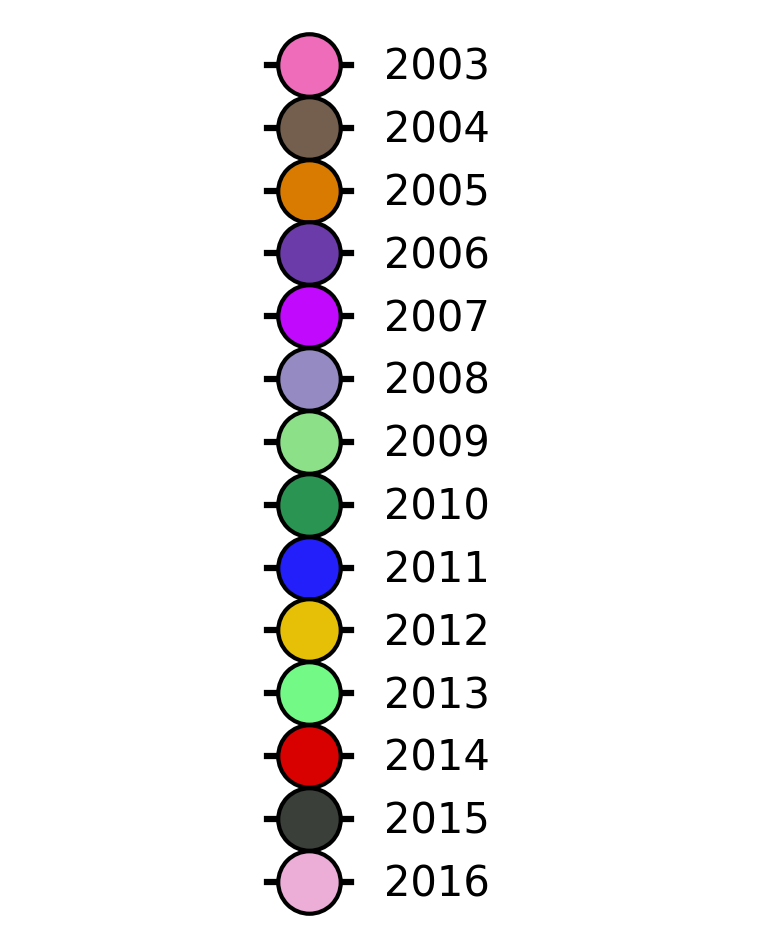

In [ ]:
# Make custom legend with these matplotlib modules (THERE ARE MORE!)
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Set up lists of colors and years
colors = np.array(["#ee6cba","#745f4f","#d97b00","#6b3ba9","#c009fd","#968ac3","#8be088","#2a9452","#221ffa", "#e5c006","#72f986","#d90000","#3a3f39","#ecadd7"])
years = np.arange(2003, 2018, step=1)

# Loop through the colors and years to make dots with each color and labels, for example
legend_elements = []
for i in range(len(years)-1):
  new_element = [Line2D([0], [0],
                 marker='o',
                 color='k',
                 label=years[i],
                 markerfacecolor=colors[i],
                 markersize=15)
                 ]
  legend_elements.extend(new_element)

# Makes figure and shows legend
fig, ax = plt.subplots(figsize = (3,3),dpi=300)
ax.legend(handles=legend_elements, loc='center', frameon = False)

# Get rid of box around plot and axes labels
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

plt.show()

#**Background Reading**

Good resources for reading more about Python coding practices and particularly techniques used in this tutorial.

In general, I highly recommend the website [RealPython](https://realpython.com/). In Erica's opinion, its even worth the subscription price for unlimited articles! 😀

## Context Managers  



Notice how when opening a raster with rasterio or while saving a .csv to Drive, we use this formula that starts with ``with``?


```
with func(something) as var:
  do_something(var)

```

This setup is called a context manager, and it ensures that when we open a file or path, that file will be closed properly once we are done running the code in the indented block (ie the do_something).

Read more about that [here](https://realpython.com/python-with-statement/)



## Working outside of Colab

* Consider using conda to create environments and install and manage packages, instead of pip. An environment is a list of packages and their versions that you can name. Having an environment for each project lets you easily switch between projects with different package needs without re-importing or having conflicting package versions!

* To import and save a GitHub file in a code folder, you can use the urlopen package like this.Here, for example, the code checks if the file is already importable (ie in the code/ folder), and if not, it gets it from GitHub.

In [ ]:
import urlopen

In [ ]:
try:
    import dendra_api_client as dendra
except ModuleNotFoundError:
    print('\nDownloading the dendra_api_client module from:')
    url = 'https://raw.githubusercontent.com/DendraScience/dendra-api-client-python/master/dendra_api_client.py'
    print(url)
    with urlopen(url) as f:
        data = f.read()
    with open('code/' + url.split('/')[-1], 'wb') as myfile:
        myfile.write(data)
    import dendra_api_client as dendra
